In [1]:
from utils import convert_boardtomatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses
import tensorflow as tf
import tensorflow.keras as keras



def filter_string(str_arr, regex): 
    p = re.compile(regex)
    return [ s for s in str_arr if p.match(s) ]

In [2]:
df = pd.read_csv('data/train.csv')

In [4]:
start_cols = filter_string(df.columns, 'start')
stop_cols = filter_string(df.columns, 'stop')

In [5]:
X = df[start_cols][:10000].to_numpy()
Y = df[stop_cols][:10000].to_numpy()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train = x_train.reshape([-1, 25, 25, 1])
x_train = np.array([convert_boardtomatrix(tm.reshape([25, 25])) for tm in x_train]).reshape([-1, 25, 25, 1])
x_test = np.array([convert_boardtomatrix(tm.reshape([25, 25])) for tm in x_test]).reshape([-1, 25, 25, 1])

In [59]:
def build_CNN():
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(25, 25, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(625, activation='hard_sigmoid'))
    model.compile(optimizer='adam',
              loss='MSE',
              metrics=['accuracy'])
    return model

In [60]:
model = build_CNN()
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 23, 23, 8)         80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 8)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 10, 10, 16)        528       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 400)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 625)             

In [61]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 2s 10ms/step - loss: 0.1329 - accuracy: 0.0034 - val_loss: 0.1176 - val_accuracy: 0.0077
Epoch 2/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1149 - accuracy: 0.0081 - val_loss: 0.1146 - val_accuracy: 0.0117
Epoch 3/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1120 - accuracy: 0.0103 - val_loss: 0.1127 - val_accuracy: 0.0080
Epoch 4/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1102 - accuracy: 0.0111 - val_loss: 0.1118 - val_accuracy: 0.0107
Epoch 5/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1091 - accuracy: 0.0113 - val_loss: 0.1114 - val_accuracy: 0.0100
Epoch 6/10
219/219 [==============================] - 2s 10ms/step - loss: 0.1083 - accuracy: 0.0111 - val_loss: 0.1112 - val_accuracy: 0.0110
Epoch 7/10
219/219 [==============================] - 2s 9ms/step - loss: 0.1075 - accuracy: 0.0117 - val_loss: 0.1108 - val_accuracy: 0.0133
Epoc

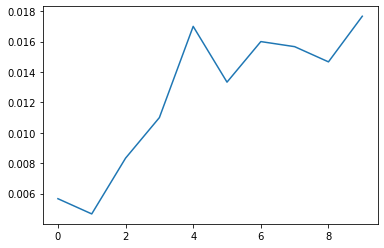

In [29]:
plt.plot(history.history['val_accuracy'])